# Breusch-Pagan test - Market cap

In [12]:
# Loading Packages
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS
import seaborn as sns
sns.set_theme()
import linearmodels.iv.model as lm
from statsmodels.stats.stattools import durbin_watson

In [4]:
#load dataset
df=pd.read_csv("Dissertation data_PB_new1.csv")
df.head()

,PB_ratio,Market_Cap,Debt_to_Equity,Z_score,Quick_Ratio,Total_Asset_Growth,Net_Debt,Operating_Profitability
0,1.557710,2.069732e+09,0.53,1.150080,0.74520,-0.13,5.782760e+08,819493000
1,4.775655,2.063733e+09,2.43,0.040388,0.41660,-0.22,2.686843e+09,136982000
2,2.365902,2.951618e+09,2.60,0.168691,0.44666,-0.02,5.894376e+09,-289209000
3,2.010892,2.423686e+09,2.33,0.195167,0.43966,-0.01,6.104871e+09,-557987000
4,1.674218,2.249709e+09,1.96,0.469774,0.54968,0.02,6.274423e+09,-302813000


In [25]:
df.columns

Index(['PB_ratio', 'Market_Cap', 'Debt_to_Equity', 'Z_score', 'Quick_Ratio',
       'Total_Asset_Growth', 'Net_Debt', 'Operating_Profitability'],
      dtype='object')

In [5]:
fit = smf.ols('Market_Cap ~ Debt_to_Equity+Z_score+Quick_Ratio+Total_Asset_Growth+Net_Debt+Operating_Profitability', data=df).fit()

In [27]:

print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:             Market_Cap   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 30 Jun 2024   Prob (F-statistic):           5.15e-32
Time:                        14:34:30   Log-Likelihood:                -9683.9
No. Observations:                 360   AIC:                         1.938e+04
Df Residuals:                     353   BIC:                         1.941e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2

In [6]:
# Conduct the Breusch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
 
# Get the test result
test_result = sms.het_breuschpagan(fit.resid, fit.model.exog)
 
lzip(names, test_result)

[('Lagrange multiplier statistic', 47.66532705129496),
 ('p-value', 1.3782438121469848e-08),
 ('f-value', 8.978542306482067),
 ('f p-value', 3.878929589908923e-09)]

Here, the Lagrange multiplier statistic for the test comes out to be equal to 47.66532705129496 and the corresponding p-value comes out to be equal to 1.3782438121469848e-08. Since the p-value is greater than 0.05 so we couldn’t reject the null hypothesis. Hence, We do not have enough proof to say that heteroscedasticity is present in the regression model.

In [7]:
print(1.3782438121469848e-08>0.05)

False


If heteroskedasticity is present in your data, it violates the assumption of homoskedasticity, which is an important assumption for the validity of the Ordinary Least Squares (OLS) regression results.

In [8]:
# Log transformation
df['log_Market_Cap'] = np.log(df['Market_Cap'] - df['Market_Cap'].min() + 1)  # Log transformation
fit1 = smf.ols('log_Market_Cap ~ Debt_to_Equity+Z_score+Quick_Ratio+Total_Asset_Growth+Net_Debt+Operating_Profitability', data=df).fit(cov_type='HC3')
print(fit1.summary())


                            OLS Regression Results                            
Dep. Variable:         log_Market_Cap   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     3.614
Date:                Wed, 03 Jul 2024   Prob (F-statistic):            0.00666
Time:                        16:50:14   Log-Likelihood:                -741.21
No. Observations:                 360   AIC:                             1496.
Df Residuals:                     353   BIC:                             1524.
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

C:\Program Files\Anconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 4
  warnings.warn('covariance of constraints does not have full '


In [9]:
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
 
# Get the test result
test_result = sms.het_breuschpagan(fit1.resid, fit1.model.exog)
 
lzip(names, test_result)

[('Lagrange multiplier statistic', 0.7878817610004951),
 ('p-value', 0.992394661597242),
 ('f-value', 0.1290427241136489),
 ('f p-value', 0.9926562191680758)]

In [11]:
print(0.992394661597242>0.05)

True


In [47]:


df['Market_Cap_lag_1'] = df['log_Market_Cap'].shift(1)
df = df.iloc[1:]
fit1 = smf.ols('log_Market_Cap ~ Debt_to_Equity+Z_score+Quick_Ratio+Total_Asset_Growth+Net_Debt+Operating_Profitability+Market_Cap_lag_1', data=df).fit()
print(fit1.summary())


                            OLS Regression Results                            
Dep. Variable:         log_Market_Cap   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     55.74
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           3.76e-53
Time:                        18:51:26   Log-Likelihood:                -656.68
No. Observations:                 356   AIC:                             1329.
Df Residuals:                     348   BIC:                             1360.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

C:\Users\DELL 3567\AppData\Local\Temp\ipykernel_7360\1024371439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Market_Cap_lag_1'] = df['log_Market_Cap'].shift(1)


# Detecting Multicollinearity with VIF – Python

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [27]:
df

,PB_ratio,Market_Cap,Debt_to_Equity,Z_score,Quick_Ratio,Total_Asset_Growth,Net_Debt,Operating_Profitability,log_Market_Cap,Market_Cap_lag_1
0,1.557710,2.069732e+09,0.530000,1.150080,0.74520,-0.130000,5.782760e+08,819493000,21.386828,NaN
1,4.775655,2.063733e+09,2.430000,0.040388,0.41660,-0.220000,2.686843e+09,136982000,21.383734,2.069732e+09
2,2.365902,2.951618e+09,2.600000,0.168691,0.44666,-0.020000,5.894376e+09,-289209000,21.761272,2.063733e+09
3,2.010892,2.423686e+09,2.330000,0.195167,0.43966,-0.010000,6.104871e+09,-557987000,21.554282,2.951618e+09
4,1.674218,2.249709e+09,1.960000,0.469774,0.54968,0.020000,6.274423e+09,-302813000,21.475471,2.423686e+09
...,...,...,...,...,...,...,...,...,...,...
355,0.982811,4.456004e+09,0.708469,0.607210,0.37702,0.087215,3.213673e+09,578771000,22.188364,2.876564e+09
356,0.937747,1.093400e+10,0.650928,0.804531,1.11379,0.048209,3.202757e+09,361198000,23.103364,4.456004e+09
357,0.919645,5.264799e+09,0.610345,1.307398,1.56526,0.063810,2.781129e+09,-4914000,22.359689,1.093400e+10
358,0.907297,4.837511e+09,0.526288,1.382878,2.25539,0.142541,2.019418e+09,98411000,22.272842,5.264799e+09


In [32]:

df

,PB_ratio,Market_Cap,Debt_to_Equity,Z_score,Quick_Ratio,Total_Asset_Growth,Net_Debt,Operating_Profitability,log_Market_Cap,Market_Cap_lag_1
2,2.365902,2.951618e+09,2.600000,0.168691,0.44666,-0.020000,5.894376e+09,-289209000,21.761272,2.063733e+09
3,2.010892,2.423686e+09,2.330000,0.195167,0.43966,-0.010000,6.104871e+09,-557987000,21.554282,2.951618e+09
4,1.674218,2.249709e+09,1.960000,0.469774,0.54968,0.020000,6.274423e+09,-302813000,21.475471,2.423686e+09
5,1.495637,3.881498e+09,1.780000,0.818039,0.61488,0.090000,6.470026e+09,251115000,22.045945,2.249709e+09
6,1.496548,9.100823e+09,1.810000,1.011237,0.60700,0.140000,6.496218e+09,250564000,22.917462,3.881498e+09
...,...,...,...,...,...,...,...,...,...,...
355,0.982811,4.456004e+09,0.708469,0.607210,0.37702,0.087215,3.213673e+09,578771000,22.188364,2.876564e+09
356,0.937747,1.093400e+10,0.650928,0.804531,1.11379,0.048209,3.202757e+09,361198000,23.103364,4.456004e+09
357,0.919645,5.264799e+09,0.610345,1.307398,1.56526,0.063810,2.781129e+09,-4914000,22.359689,1.093400e+10
358,0.907297,4.837511e+09,0.526288,1.382878,2.25539,0.142541,2.019418e+09,98411000,22.272842,5.264799e+09


In [33]:
# the independent variables set 
x=df[['Debt_to_Equity','Z_score','Quick_Ratio','Total_Asset_Growth','Net_Debt','Operating_Profitability','Market_Cap_lag_1']]

In [34]:
# VIF dataframe
vif_data = pd.DataFrame() 
vif_data["feature"] = x.columns 

In [35]:
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x.values, i) 
                          for i in range(len(x.columns))] 
print(vif_data)

                   feature       VIF
0           Debt_to_Equity  1.032821
1                  Z_score  2.931778
2              Quick_Ratio  2.496179
3       Total_Asset_Growth  1.166712
4                 Net_Debt  2.436405
5  Operating_Profitability  3.097851
6         Market_Cap_lag_1  1.499771


                         PB_ratio  Market_Cap  Debt_to_Equity   Z_score  \
PB_ratio                 1.000000    0.030407        0.836217 -0.071234   
Market_Cap               0.030407    1.000000       -0.051844  0.115120   
Debt_to_Equity           0.836217   -0.051844        1.000000 -0.138039   
Z_score                 -0.071234    0.115120       -0.138039  1.000000   
Quick_Ratio             -0.062358   -0.084456       -0.058850  0.711135   
Total_Asset_Growth      -0.128077    0.095407       -0.152344  0.136360   
Net_Debt                 0.039864    0.211109        0.017152 -0.242322   
Operating_Profitability  0.030632    0.550107       -0.065919  0.035361   

                         Quick_Ratio  Total_Asset_Growth  Net_Debt  \
PB_ratio                   -0.062358           -0.128077  0.039864   
Market_Cap                 -0.084456            0.095407  0.211109   
Debt_to_Equity             -0.058850           -0.152344  0.017152   
Z_score                     0.711135        

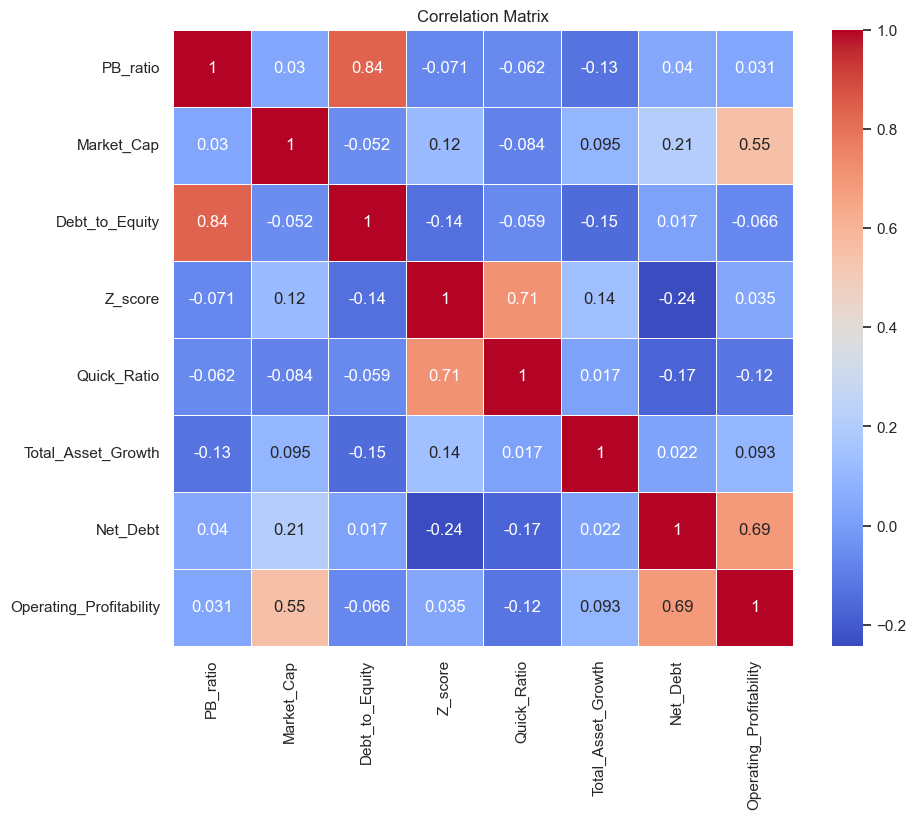

In [33]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [37]:
# the independent variables set 
x=df[['Debt_to_Equity','Total_Asset_Growth','Net_Debt','Operating_Profitability','Market_Cap_lag_1']]
# VIF dataframe
vif_data = pd.DataFrame() 
vif_data["feature"] = x.columns 
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x.values, i) 
                          for i in range(len(x.columns))] 
print(vif_data)

                   feature       VIF
0           Debt_to_Equity  1.030008
1       Total_Asset_Growth  1.063462
2                 Net_Debt  2.343420
3  Operating_Profitability  2.834674
4         Market_Cap_lag_1  1.480492


In [48]:
fit1 = smf.ols('log_Market_Cap ~ Debt_to_Equity+Total_Asset_Growth+Net_Debt+Operating_Profitability+Market_Cap_lag_1', data=df).fit()
print(fit1.summary())


                            OLS Regression Results                            
Dep. Variable:         log_Market_Cap   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     77.86
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           1.00e-54
Time:                        18:52:14   Log-Likelihood:                -657.44
No. Observations:                 356   AIC:                             1327.
Df Residuals:                     350   BIC:                             1350.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

# Wu-Hausman and Sargan Tests in Python

In [49]:
mlr1 = smf.ols('log_Market_Cap ~ Debt_to_Equity+Z_score+Quick_Ratio+Total_Asset_Growth+Net_Debt+Operating_Profitability+Market_Cap_lag_1', data=df).fit()

In [50]:
print(mlr1.summary())

                            OLS Regression Results                            
Dep. Variable:         log_Market_Cap   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     55.74
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           3.76e-53
Time:                        18:52:22   Log-Likelihood:                -656.68
No. Observations:                 356   AIC:                             1329.
Df Residuals:                     348   BIC:                             1360.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [53]:
mdatac = sm.add_constant(data=df, prepend=False)
mlr2 = lm.IV2SLS(dependent=mdatac["Market_Cap"], exog=mdatac[['Debt_to_Equity','Total_Asset_Growth','Net_Debt']], endog=mdatac["Operating_Profitability"], instruments=mdatac[["Market_Cap_lag_1"]]).fit(cov_type="homoskedastic", debiased=True)

In [54]:
print(mlr2.wu_hausman())

Wu-Hausman test of exogeneity
H0: All endogenous variables are exogenous
Statistic: 13.7131
P-value: 0.0002
Distributed: F(1,351)


we can see that P-values are less than alpha=0.05 and so we cannot accept the null hypothesis (the coefficient of residual is significant and logem4 can help to explain differences in logpgp95). 

In [55]:
print(0.0002<0.05)

True
